In [10]:
import pandas as pd

listings = pd.read_csv(
    r"C:\Users\laptech\Desktop\AirBnb Listings Analysis\Listings.csv",
    encoding="ISO-8859-1",
    low_memory=False,
    parse_dates=["host_since"]
)

In [4]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
listings.info

<bound method DataFrame.info of         listing_id                                               name  \
0           281420     Beautiful Flat in le Village Montmartre, Paris   
1          3705183                    39 mÃÂ² Paris (Sacre CÃ
âur)   
2          4082273                Lovely apartment with Terrace, 60m2   
3          4797344                Cosy studio (close to Eiffel tower)   
4          4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms   
...            ...                                                ...   
279707    38338635  Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...   
279708    38538692                          Cozy Studio in Montmartre   
279709    38683356            Nice and cosy mini-appartement in Paris   
279710    39659000  Charming apartment near Rue Saint Maur / Oberk...   
279711    40219504        Cosy apartment with view on Canal St Martin   

         host_id  host_since                 host_location host_response_time  \
0        1

In [24]:
paris_listing = listings[
    listings['city'].str.contains('paris', case=False, na=False)
][[
    'neighbourhood',
    'city',
    'accommodates',
    'price',
    'host_since'
]]


paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   neighbourhood  64690 non-null  object        
 1   city           64690 non-null  object        
 2   accommodates   64690 non-null  int64         
 3   price          64690 non-null  int64         
 4   host_since     64657 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [25]:
paris_listing.isna().sum()

neighbourhood     0
city              0
accommodates      0
price             0
host_since       33
dtype: int64

In [26]:
paris_listing.describe()

,accommodates,price,host_since
count,64690.000000,64690.000000,64657
mean,3.037997,113.096445,2015-11-01 11:06:05.528867584
min,0.000000,0.000000,2008-08-30 00:00:00
25%,2.000000,59.000000,2014-03-09 00:00:00
50%,2.000000,80.000000,2015-07-07 00:00:00
75%,4.000000,120.000000,2017-05-29 00:00:00
max,16.000000,12000.000000,2021-02-07 00:00:00
std,1.588766,214.433668,NaN


In [28]:
paris_listing.query("accommodates == 0")#.count()

,neighbourhood,city,accommodates,price,host_since
98209,Pantheon,Paris,0,0,2020-07-20
203257,Batignolles-Monceau,Paris,0,0,2020-02-04
203258,Opera,Paris,0,0,2016-10-17
203259,Luxembourg,Paris,0,0,2020-04-24
203260,Vaugirard,Paris,0,0,2020-04-24
203261,Batignolles-Monceau,Paris,0,0,2020-07-15
203263,Palais-Bourbon,Paris,0,0,2016-06-07
203264,Pantheon,Paris,0,0,2020-09-08
203265,Vaugirard,Paris,0,0,2020-09-21
203267,Observatoire,Paris,0,0,2020-10-29


In [31]:
paris_listing_neighbourhood = (
    paris_listing
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")
)

paris_listing_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [32]:
paris_listing_accommodates = (
    paris_listing
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price")
    
)

paris_listing_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [36]:
paris_listing_over_time = (
    paris_listing
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood": "count",
        "price" : "mean"
        })
    
)

paris_listing_over_time.tail()

C:\Users\laptech\AppData\Local\Temp\ipykernel_25688\2609805469.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y")


,neighbourhood,price
host_since,,
2017-12-31,4585,108.658888
2018-12-31,4294,138.209362
2019-12-31,5694,129.757113
2020-12-31,3412,141.456038
2021-12-31,133,93.488722


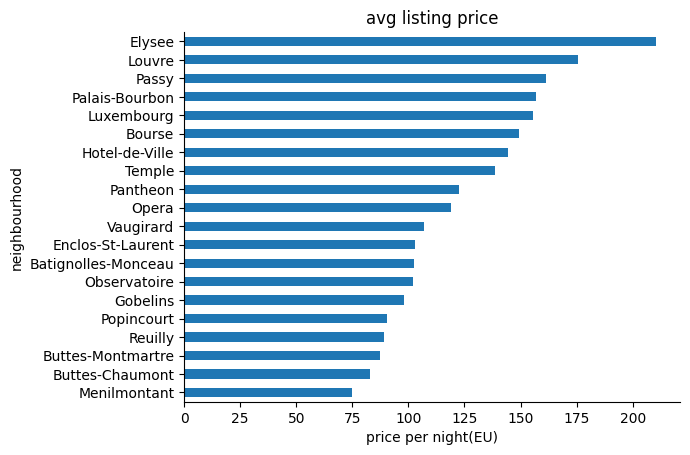

In [41]:
import seaborn as sns


(paris_listing_neighbourhood
 .plot
 .barh(
     title = "avg listing price", 
     xlabel = "price per night(EU)",
     ylabel = "neighbourhood",
     legend = None
 )
 
)

sns.despine()

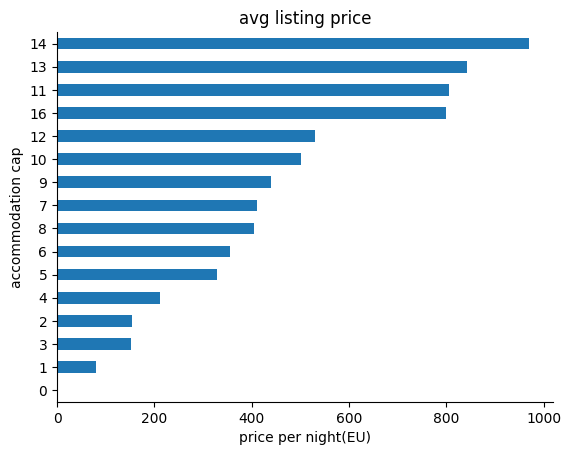

In [42]:
import seaborn as sns


(paris_listing_accommodates
 .plot
 .barh(
     title = "avg listing price", 
     xlabel = "price per night(EU)",
     ylabel = "accommodation cap",
     legend = None
 )
 
)

sns.despine()

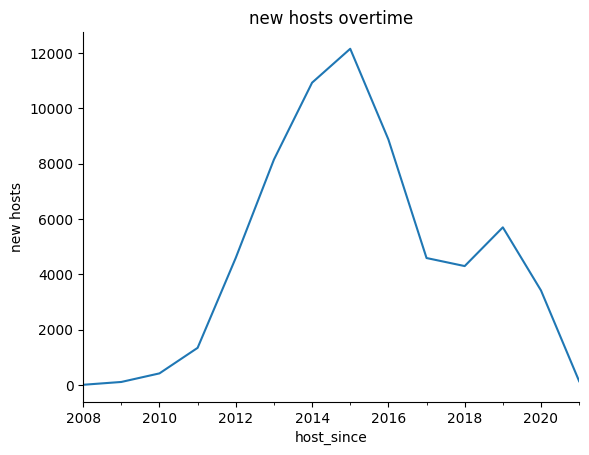

In [44]:
paris_listing_over_time["neighbourhood"].plot(
    ylabel="new hosts",
    title="new hosts overtime"
    
)

sns.despine()

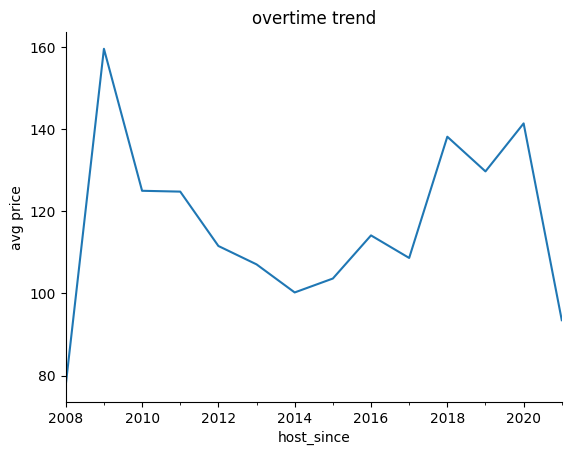

In [45]:
paris_listing_over_time["price"].plot(
    ylabel="avg price",
    title="overtime trend"
    
)

sns.despine()

Text(0, 0.5, 'abg price')

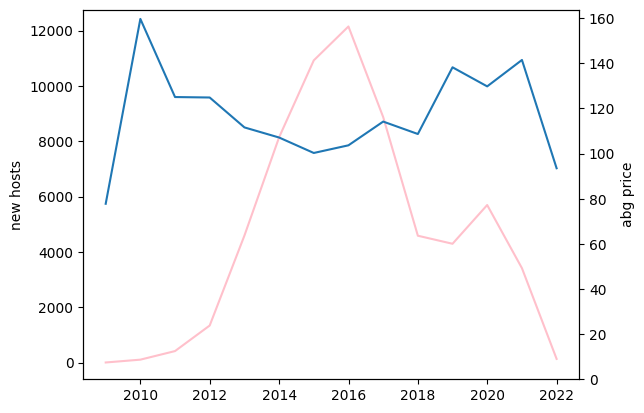

In [48]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

ax.plot(
    paris_listing_over_time.index,
    paris_listing_over_time["neighbourhood"],
    label = "new hosts",
    c = "pink"
    
)

ax.set_ylabel("new hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listing_over_time.index,
    paris_listing_over_time["price"],
    label = "avg price",
    
)

ax2.set_ylim(0)
ax2.set_ylabel("abg price")
